In [207]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [208]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Charlotte Condo Regression

In [209]:
file_path = Path("../Resources/char_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,94489.0,"Charlotte, NC",-54.931841,-1.916221
1996-02-29,94671.0,"Charlotte, NC",0.192615,-54.931841
1996-03-31,94931.0,"Charlotte, NC",0.274635,0.192615
1996-04-30,95474.0,"Charlotte, NC",0.571994,0.274635
1996-05-31,96071.0,"Charlotte, NC",0.625301,0.571994


<AxesSubplot:xlabel='date'>

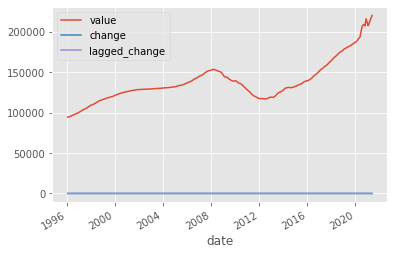

In [210]:
metro_df.plot()

In [211]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [212]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [213]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [214]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 0.06364834, -0.44691729,  0.08395743,  0.08474733,  0.08761104,
        0.08812441,  0.08796669,  0.08820022,  0.08808265,  0.08764231,
        0.08634854,  0.08720656,  0.08868149,  0.09021511,  0.09054815,
        0.08931113,  0.08814017,  0.08735604,  0.08786582,  0.0872411 ,
        0.08805807,  0.08903381,  0.09119371,  0.09021165,  0.08816026,
        0.08625718,  0.08603689,  0.08719554,  0.0878489 ,  0.08878565,
        0.08855021,  0.08883227,  0.08820812,  0.08707267,  0.08658542,
        0.08549506,  0.08543319,  0.0850317 ,  0.0860983 ,  0.08617242,
        0.08643423,  0.08509172,  0.08490334,  0.08565024,  0.08433494,
        0.08541115,  0.08460363,  0.08649825,  0.08659806,  0.08655332,
        0.0862243 ,  0.08557652,  0.0853992 ,  0.0858886 ,  0.08544521,
        0.08485904,  0.08481246,  0.08438019,  0.08456739,  0.08463024,
        0.08438607,  0.08447241,  0.08372685,  0.08422659,  0.08346226,
        0.0836955 ,  0.08364743,  0.08388692,  0.08395154,  0.08

In [215]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.08210245988016603

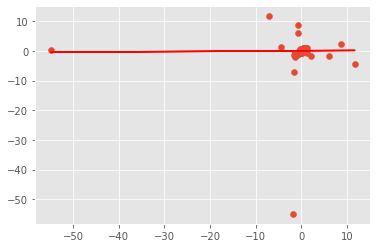

In [216]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [217]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [218]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 9.27980489572322e-05
R-squared (R2 ): 9.27980489572322e-05
Mean Squared Error (MSE): 11.328498778547246
Root Mean Squared Error (RMSE): 3.3657835311480215
Standard Deviation: 3.3659397110904528


In [219]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [220]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [221]:
# Train the data
#classifier.fit(X_train, y_train)

In [222]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [223]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [224]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [225]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [226]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [227]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [228]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [229]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [230]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [232]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 5
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [233]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [234]:
# Summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 3, 5)              140       
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 5)              0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 3, 5)              220       
_________________________________________________________________
dropout_19 (Dropout)         (None, 3, 5)              0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_20 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [235]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.2138A: 0s - loss: 0.20
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1570
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1261
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1205
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1273
Epoch 6/10
239/239 [==============================] - 0s 2ms/step - loss: 0.1214
Epoch 7/10
239/239 [==============================] - 0s 2ms/step - loss: 0.1203
Epoch 8/10
239/239 [==============================] - 0s 2ms/step - loss: 0.1180
Epoch 9/10
239/239 [==============================] - 0s 2ms/step - loss: 0.1110
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1138


In [236]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 3ms/step - loss: 4.9860


4.98597526550293

In [237]:
# Make some predictions
predicted = model.predict(X_test)

In [238]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [239]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.head()

,Real,Predicted
date,,
2016-04-30,2.265001,-1.445427
2016-05-31,4.280072,-2.485808
2016-06-30,7.697904,-0.785719
2016-07-31,11.833622,0.326929
2016-08-31,10.075716,1.092402


<AxesSubplot:xlabel='date'>

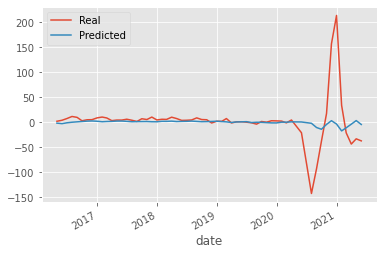

In [240]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [241]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)